In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grape = [8, 5]
fish = [2, 3]
carrot = [7, 10]
orange = [7, 3]
celery = [3, 8]
cheese = [1, 1]
category = ['과일', '단백질', '채소', '과일', '채소', '단백질']

In [4]:
dan = int(input('단만 입력(1~10) : '))
asac = int(input('아삭거림 입력(1~10) : '))

단만 입력(1~10) : 1
아삭거림 입력(1~10) : 2


In [5]:
target = [dan, asac]

In [9]:
def data_set() :
    dataset = np.array([grape, fish, carrot, orange, celery, cheese])
    size = len(dataset)
    class_target = np.tile(target, (size, 1))
    class_category = np.array(category)
    return dataset, class_target, class_category

In [11]:
dataset, class_target, class_category = data_set()

In [12]:
dataset

array([[ 8,  5],
       [ 2,  3],
       [ 7, 10],
       [ 7,  3],
       [ 3,  8],
       [ 1,  1]])

In [13]:
class_target

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [14]:
class_category

array(['과일', '단백질', '채소', '과일', '채소', '단백질'], dtype='<U3')

In [56]:
def classify(dataset, class_target, class_category, k) :
    # 유클리드 거리 계산
    diffMat = class_target - dataset # 두 점의 차 
    sqDiffMat = diffMat ** 2 # 차에 대한 제곱 
    row_sum = sqDiffMat.sum(axis = 1) # 차에 대한 제곱의 합 
    distance = np.sqrt(row_sum) # 차의 제곱에 대한 합의 제곱근(최종 거리)
#     print(np.frombuffer(distance.tostring(), dtype=float))
    
    
    # 가까운 거리 오름차순 정렬
    sortDist = distance.argsort()
    print(np.frombuffer(sortDist.tostring))
    # 이웃한 k개 선정
    class_result = {}
    for i in range(k) :
        c = class_category[sortDist[i]]
        class_result[c] = class_result.get(c,0) + 1 
    
    # print('class_result : ' + class_result)
    return class_result

In [46]:
k = int(input('k값 입력(1,3 : )'))

k값 입력(1,3 : )5


In [57]:
class_result = classify(dataset, class_target, class_category, k) 
print(class_result)

AttributeError: 'builtin_function_or_method' object has no attribute '__buffer__'

In [51]:
def classify_result(class_result) :
    protein = fruit = vegetable = 0
    
    for c in class_result.keys() :
        if c == '단백질' :
            protein = class_result[c]
        elif c == '과일' :
            fruit = class_result[c] 
        else : 
            vegetable = class_result[c] 
            
    if protein > fruit and protein > vegetable : 
        result = 'It classified as protein' 
    elif fruit > protein and fruit > vegetable : 
        result = 'It classified as fruit'
    else :
        result = 'It classified as vege'
    
    return result 

In [52]:
a = classify_result(class_result)

In [53]:
a

'It classified as vege'

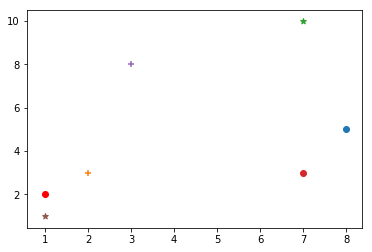

In [47]:
# 시각화(o= 과일, +=단밸질, *=채소
plt.scatter(8, 5, marker='o')
plt.scatter(2, 3, marker='+')   
plt.scatter(7, 10, marker='*') 
plt.scatter(7, 3, marker='o')
plt.scatter(3, 8, marker='+')
plt.scatter(1, 1, marker='*')
plt.scatter(dan, asac, color='red') # 분류대상 -> B집단 

plt.show()
